In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import *
from qiskit import Aer
from qiskit.visualization import plot_state_city as pltstate
from qiskit.visualization import plot_histogram 
%matplotlib inline

***Circuit to Measure $\hat{J}^2_{+} +\hat{J}^2_{-}$***

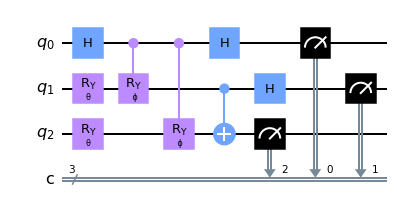

In [2]:
from qiskit.circuit import Parameter

theta, phi = Parameter('θ'), Parameter(' ϕ') 

qc = QuantumCircuit(3,3)

qc.h(0)
qc.ry(theta, 1)
qc.cry(phi, 0, 1)
qc.ry(theta,2)
qc.cry(phi, 0, 2)
qc.cx(1, 2)
qc.h(0)
qc.h(1)

qc.measure(0, 0)
qc.measure(1,1)
qc.measure(2,2)

qc.draw('mpl')

In [3]:
thetas = np.linspace(0,2*np.pi,128)

phis = np.linspace(0,2*np.pi,128)


In [4]:
def lipkin(theta,phi,shots=1024):
    backend = Aer.get_backend('qasm_simulator')
    
    qc = QuantumCircuit(3,3)

    qc.h(0)
    qc.ry(theta, 1)
    qc.cry(phi, 0, 1)
    qc.ry(theta,2)
    qc.cry(phi, 0, 2)
    qc.cx(1, 2)
    qc.h(0)
    qc.h(1)

    qc.measure(0, 0)
    qc.measure(1,1)
    qc.measure(2,2)
    
    job = execute(qc, backend, shots = shots)
    results = job.result()
    counts = results.get_counts(qc)
    if '000' not in counts:
        counts['000'] = 0 
    if '010' not in counts:
        counts['010'] = 0 
    if '001' not in counts:
        counts['001'] = 0 
    if '100' not in counts:
        counts['100'] = 0 
    if '110' not in counts:
        counts['110'] = 0 
    if '101' not in counts:
        xCounts['101'] = 0 
    if '011' not in counts:
        counts['011'] = 0 
    if '111' not in counts:
        counts['111'] = 0 
    
    
    return counts

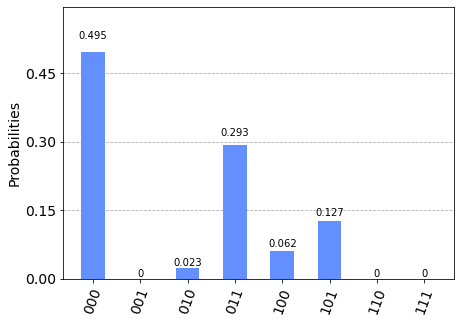

In [5]:
shots = 1024
test = lipkin(1.0,2.3,shots=1024)
plot_histogram(test)


$$p_{123}(000)-p_{123}(011) = \frac{1}{4} \left( \langle\theta|\hat{J}^2_{+} +\hat{J}^2_{-}|
\theta\rangle + \langle\theta+\phi|\hat{J}^2_{+} +\hat{J}^2_{-}|
\theta+\phi\rangle+2\langle\theta|\hat{J}^2_{+} +\hat{J}^2_{-}|
\theta+\phi\rangle  \right)$$

In [6]:
expectationval = test['000']/shots -test['011']/shots
print(expectationval)

0.2021484375


$$p_{123}(000)-p_{123}(011)-p_{123}(100)+p_{123}(111) =\langle\theta|\hat{J}^2_{+} +\hat{J}^2_{-}|
\theta+\phi\rangle  $$

In [7]:
expectationval2 = test['000']/shots -test['011']/shots - test['100']/shots +test['111']/shots
print(expectationval2)

0.140625


***Analytical Solution for  $\langle \hat{\mathcal{H}}\rangle$***
$$\langle \hat{\mathcal{H}}\rangle = -\frac{N\epsilon}{2}\left( \cos{2\theta}+\frac{(N-1)V}{2\epsilon}\sin^2{2\theta}\right)= -\frac{N\epsilon}{2}\left( \cos{2\theta}+\frac{\chi}{2}\sin^2{2\theta}\right)$$

**Measuring $\langle \hat{J}_z \rangle$**
$$\langle \hat{J}_z \rangle = \frac{1}{2}(p(0)-p(1)) = p(0)-\frac{1}{2}=\frac{1}{2}\cos{2\theta}$$

In [8]:
def expectationJz(theta, shots):
    backend = Aer.get_backend('qasm_simulator')
  
    
    zqc = QuantumCircuit(1,1)
    zqc.ry(2*theta,0)
    zqc.measure(0,0)
    
    
    zJob = execute(zqc, backend, shots=shots)
    zRes = zJob.result()
    zCounts = zRes.get_counts(zqc)
    
    if '0' not in zCounts:
        zCounts['0'] = 0 
        
    Jz = zCounts['0']/shots -1/2 #compute expectation value of Jz using equation
    
    
    return Jz

In [9]:
theta  = np.linspace(0, 2*np.pi, int(1e4))
nshots = 2048

In [10]:
exval = lambda theta : expectationJz(theta, shots = nshots)
expvals = np.vectorize(exval)(theta)

Text(0, 0.5, '$\\langle J_z \\rangle$')

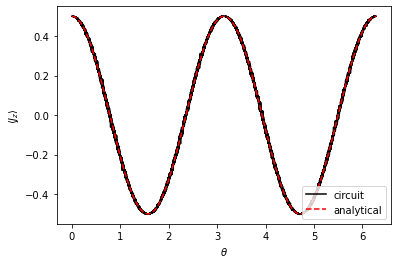

In [11]:
plt.plot(theta,expvals,label = "circuit",c = 'k')
plt.plot(theta,0.5*np.cos(2*theta),'--',c= 'r',label = 'analytical')
plt.legend(loc='lower right')
plt.xlabel(r'$ \theta $')
plt.ylabel(r'$\langle J_z \rangle$')

**Measuring $\langle\hat{J}^2_{+} +\hat{J}^2_{-}\rangle$**
$$\langle\hat{J}^2_{+} +\hat{J}^2_{-}\rangle = p(00)-p(10) = \frac{1}{2}\sin^2{2\theta}$$ 

In [12]:
def expJpJm(theta,shots):
    backend = Aer.get_backend('qasm_simulator')
  
    
    Jqc = QuantumCircuit(2,2)
    Jqc.ry(2*theta,0)
    Jqc.ry(2*theta,1)
    Jqc.cx(0,1)
    Jqc.h(0)
    Jqc.measure(0,0)
    Jqc.measure(1,1)
    
    jJob = execute(Jqc, backend, shots=shots)
    jRes = jJob.result()
    jCounts = jRes.get_counts(Jqc)
    
    if '00' not in jCounts:
        jCounts['00'] = 0
    if '01' not in jCounts: #qiskit flips last bit with first bit
        jCounts['01'] = 0
        
    JpJm = jCounts['00']/shots -jCounts['01']/shots #compute expectation value of Jp^2+Jm^2 using equation
    
    
    return JpJm

In [13]:
exval = lambda theta : expJpJm(theta,nshots)
expvals = np.vectorize(exval)(theta)

Text(0, 0.5, '$\\langle J_+ + J_- \\rangle$')

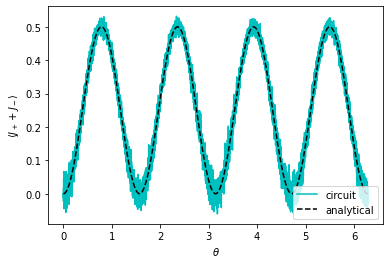

In [14]:
plt.plot(theta,expvals,label = "circuit",c = 'c')
plt.plot(theta,0.5*(np.sin(2*theta))**2,'--',c= 'k',label = 'analytical')
plt.legend(loc='lower right')
plt.xlabel(r'$ \theta $')
plt.ylabel(r'$\langle J_+ + J_- \rangle$')

# Matrix Element Determination

**Measuring matrix elements of $\hat{J}_z$**

$$p_{12}(00)-p_{12}(01) = \frac{1}{4}[\langle \theta|\textbf{Z} | \theta \rangle+\langle \theta+\phi|\textbf{Z} | \theta+\phi \rangle + 2\langle \theta|\textbf{Z} | \theta +\phi\rangle]$$

In [15]:
def jz(theta,phi,shots):
    backend = Aer.get_backend('qasm_simulator')
  
    
    Jzqc = QuantumCircuit(2,2)
    Jzqc.h(0)
    Jzqc.ry(2*theta,1)
    Jzqc.cry(2*phi,0,1)
    Jzqc.h(0)
    Jzqc.measure(0,0)
    Jzqc.measure(1,1)
    
    jzJob = execute(Jzqc, backend, shots=shots)
    jzRes = jzJob.result()
    jzCounts = jzRes.get_counts(Jzqc)
    
    if '00' not in jzCounts:
        jzCounts['00'] = 0
    if '01' not in jzCounts:
        jzCounts['01'] = 0
        
    jzave = jzCounts['00']/shots -jzCounts['01']/shots
    
    
    return jzave

Text(0.5, 1.0, '$\\phi =\\pi$/4')

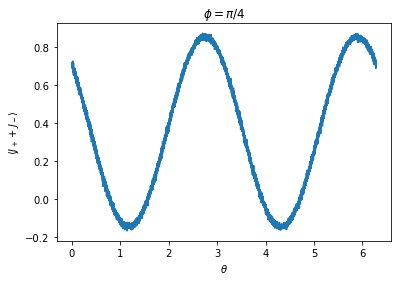

In [18]:
phi = np.pi/4 
exval = lambda theta : jz(theta,phi,nshots)
expvals = np.vectorize(exval)(theta)

plt.plot(theta,expvals,label = "circuit")
plt.xlabel(r'$ \theta $')
plt.ylabel(r'$\langle J_+ + J_- \rangle$')
plt.title('$\phi =\pi$/4')

Text(0.5, 1.0, '$\\phi =\\pi$/8')

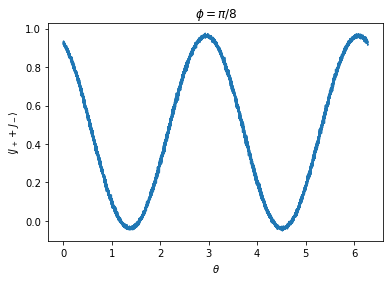

In [19]:
phi = np.pi/8
exval = lambda theta : jz(theta,phi,nshots)
expvals = np.vectorize(exval)(theta)

plt.plot(theta,expvals,label = "circuit")
plt.xlabel(r'$ \theta $')
plt.ylabel(r'$\langle J_+ + J_- \rangle$')
plt.title('$\phi =\pi$/8')

$$p_{12}(00)-p_{12}(01) -p_{12}(10)+p_{12}(11)= \langle \theta|\textbf{Z} | \theta +\phi\rangle]$$

In [24]:
def offdiag(theta,phi,shots):
    backend = Aer.get_backend('qasm_simulator')
  
    
    Jzqc = QuantumCircuit(2,2)
    Jzqc.h(0)
    Jzqc.ry(2*theta,1)
    Jzqc.cry(2*phi,0,1)
    Jzqc.h(0)
    Jzqc.measure(0,0)
    Jzqc.measure(1,1)
    
    offdiagJob = execute(Jzqc, backend, shots=shots)
    offdiagRes = offdiagJob.result()
    offdiagCounts = offdiagRes.get_counts(Jzqc)
    
    if '00' not in offdiagCounts:
        offdiagCounts['00'] = 0
    if '01' not in offdiagCounts:
        offdiagCounts['01'] = 0
    if '10' not in offdiagCounts:
        offdiagCounts['10'] = 0
    if '11' not in offdiagCounts:
        offdiagCounts['11'] = 0    
    offdiag = offdiagCounts['00']/shots -offdiagCounts['01']/shots+offdiagCounts['11']/shots -offdiagCounts['10']/shots
    
    
    return offdiag

Text(0.5, 1.0, '$\\phi =\\pi$/2')

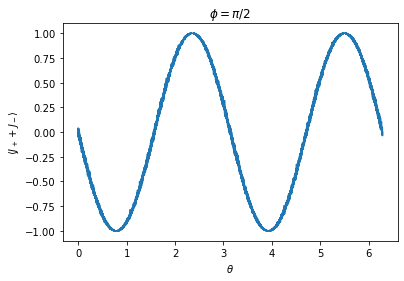

In [27]:
phi = np.pi/2
exval = lambda theta : offdiag(theta,phi,nshots)
expvals = np.vectorize(exval)(theta)

plt.plot(theta,expvals,label = "circuit")
plt.xlabel(r'$ \theta $')
plt.ylabel(r'$\langle J_+ + J_- \rangle$')
plt.title('$\phi =\pi$/2')

In [28]:
def jpjm(theta,phi,shots):
    backend = Aer.get_backend('qasm_simulator')
  
    
    jpjmqc = QuantumCircuit(3,3)
    jpjmqc.h(0)
    jpjmqc.ry(2*theta,1)
    jpjmqc.cry(2*phi,0,1)
    jpjmqc.ry(2*theta,2)
    
    jpjmqc.h(0)
    jpjmqc.cry(2*phi,0,2)
    jpjmqc.cx(1,2)
    jpjmqc.h(1)
    jpjmqc.measure(0,0)
    jpjmqc.measure(1,1)
    jpjmqc.measure(2,2)
    
    jpjmJob = execute(jpjmqc, backend, shots=shots)
    jpjmRes = jpjmJob.result()
    jpjmCounts = jpjmRes.get_counts(jpjmqc)
    
    if '000' not in jpjmCounts:
        jpjmCounts['000'] = 0
    if '011' not in jpjmCounts:
        jpjmdiagCounts['011'] = 0
    if '100' not in jpjmCounts:
        jpjmdiagCounts['100'] = 0
    if '111' not in jpjmCounts:
        jpjmCounts['111'] = 0    
        
    jpjmave = jpjmCounts['000']/shots -jpjmCounts['011']/shots -jpjmCounts['100']/shots + jpjm['111']/shots
    
    
    return jpjmave

In [30]:
phi = np.pi/2
exval = lambda theta : jpjm(theta,phi,nshots)
expvals = np.vectorize(exval)(theta)

plt.plot(theta,expvals,label = "circuit")
plt.xlabel(r'$ \theta $')
plt.ylabel(r'$\langle J_+ + J_- \rangle$')
plt.title('$\phi =\pi$/2')

TypeError: 'function' object is not subscriptable